In [3]:
import pandas as pd
import numpy as np

In [4]:
apps_df = pd.read_csv("Google play store.csv")
reviews_df = pd.read_csv("User reviews.csv")


In [5]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
apps_df = apps_df.dropna(subset=['Rating'])  # remove rows will missing values
for column in apps_df.columns:
    apps_df[column].fillna(apps_df[column].mode()[0],inplace=True) # replace missing values with mode() fo that column 
apps_df.drop_duplicates(inplace=True)  # drop duplicates
apps_df =apps_df[apps_df['Rating']<=5]
reviews_df.dropna(subset=['Translated_Review'],inplace=True)
apps_df
    

C:\Users\17bin\AppData\Local\Temp\ipykernel_14880\3027772069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df[column].fillna(apps_df[column].mode()[0],inplace=True) # replace missing values with mode() fo that column


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
apps_df['Installs']=apps_df['Installs'].str.replace(',','').str.replace('+','').astype(int)
apps_df['Price'] = apps_df['Price'].str.replace('$','').astype(float)

In [10]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
merged_df =pd.merge(apps_df,reviews_df,on="App",how='inner')
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59119,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Nice broser slow browsing speed... make 8mbps ...,Positive,0.100000,0.492308
59120,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,The thing I found missing simple bookmark draw...,Positive,0.225000,0.426786
59121,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Great Relief unwanted pop ups showing up. What...,Positive,0.650000,0.625000
59122,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Hoped found new go-to; LOVE Firefox PC. Aside ...,Positive,0.345455,0.484848


In [12]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'K' in size:
        return float(size.replace('K',''))/1024
    else:
        return np.nan
apps_df['Size']=apps_df['Size'].apply(convert_size)


In [13]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [14]:
apps_df['Log_Installs']=np.log(apps_df['Installs'])

In [15]:
apps_df['Log_Reviews'] = np.log(apps_df['Reviews'].astype(int))

In [16]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925,6.874198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,6.214608,1.945910
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,8.517193,3.637586
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,4.605170,1.386294
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,6.907755,4.736198


In [17]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Log_Installs      float64
Log_Reviews       float64
dtype: object

In [18]:
def rating_group(rating):
    if rating >=4:
        return 'Top rated app'
    elif rating >= 3:
        return 'Above average'
    elif rating >= 2:
        return 'Below Average'
    else:
        return 'Below average'
apps_df['Rating']=apps_df['Rating'].apply(rating_group)

# 1  Create a scatter plot to visualize the relationship between revenue and the number of installs for paid apps only. Add a trendline to show the correlation and color-code the points based on app categories.

In [19]:
apps_df = apps_df[apps_df['Price']!=0]
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews
234,TurboScan: scan documents and receipts in PDF,BUSINESS,Top rated app,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,11.512925,9.345046
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,Top rated app,10295,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,11.512925,9.239414
427,Puffin Browser Pro,COMMUNICATION,Top rated app,18247,NaN,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,11.512925,9.811756
476,"Moco+ - Chat, Meet People",DATING,Top rated app,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,9.210340,7.342779
477,Calculator,DATING,Below Average,57,6.2,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,6.907755,4.043051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,Top rated app,5,NaN,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up,4.605170,1.609438
10697,Mu.F.O.,GAME,Top rated app,2,16.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up,0.000000,0.693147
10760,Fast Tract Diet,HEALTH_AND_FITNESS,Top rated app,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,6.907755,3.555348
10782,Trine 2: Complete Story,GAME,Above average,252,11.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,9.210340,5.529429


In [20]:
apps_df['Revenue']=apps_df['Price']*apps_df['Installs']
apps_df

C:\Users\17bin\AppData\Local\Temp\ipykernel_14880\806735949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_df['Revenue']=apps_df['Price']*apps_df['Installs']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,Top rated app,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,11.512925,9.345046,499000.00
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,Top rated app,10295,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,11.512925,9.239414,499000.00
427,Puffin Browser Pro,COMMUNICATION,Top rated app,18247,NaN,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,11.512925,9.811756,399000.00
476,"Moco+ - Chat, Meet People",DATING,Top rated app,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,9.210340,7.342779,39900.00
477,Calculator,DATING,Below Average,57,6.2,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,6.907755,4.043051,6990.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,Top rated app,5,NaN,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up,4.605170,1.609438,99.00
10697,Mu.F.O.,GAME,Top rated app,2,16.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up,0.000000,0.693147,0.99
10760,Fast Tract Diet,HEALTH_AND_FITNESS,Top rated app,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,6.907755,3.555348,7990.00
10782,Trine 2: Complete Story,GAME,Above average,252,11.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,9.210340,5.529429,169900.00


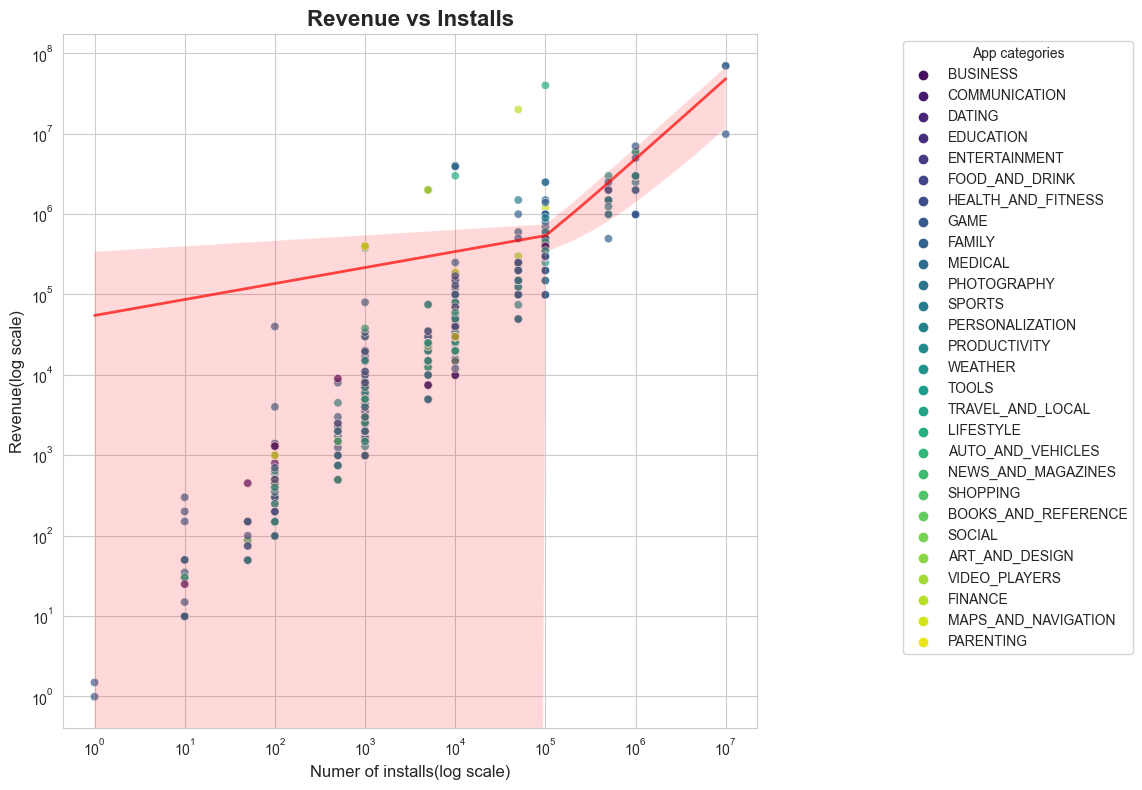

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))

scatter = sns.scatterplot(
    data = apps_df,
    x='Installs',
    y='Revenue',
    hue='Category',
    palette ='viridis',
    alpha=0.7
)

sns.regplot(
    data =apps_df,
    x='Installs',
    y='Revenue',
    scatter=False,
    color='red',
    line_kws={'linewidth':2, 'alpha':0.7}
)

plt.xscale('log')
plt.yscale('log')

plt.title('Revenue vs Installs',fontsize=16,fontweight='bold')
plt.xlabel("Numer of installs(log scale)",fontsize=12)
plt.ylabel('Revenue(log scale)',fontsize=12)
plt.legend(title='App categories',bbox_to_anchor=(1.2,1),loc ='upper left')
plt.tight_layout()





# 2.   Create an interactive Choropleth map using Plotly to visualize global installs by Category. Apply filters to show data for only the top 5 app categories and highlight category where the number of installs exceeds 1 million. The app category should not start with the characters “A,” “C,” “G,” or “S.” This graph should work only between 6 PM IST and 8 PM IST; apart from that time, we should not show it in the dashboard itself

In [22]:
filtered_data = apps_df[
    (apps_df['Installs']>100000) & 
    (~apps_df['Category'].str.startswith(('A','C','G','S')))
]
filtered_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Revenue
853,Toca Life: City,EDUCATION,Top rated app,31085,24.0,500000,Paid,3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up,13.122363,10.344481,1995000.0
2151,Toca Life: City,FAMILY,Top rated app,31100,24.0,500000,Paid,3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up,13.122363,10.344963,1995000.0
2241,Minecraft,FAMILY,Top rated app,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,16.118096,14.681166,69900000.0
2242,Card Wars - Adventure Time,FAMILY,Top rated app,129603,23.0,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up,13.815511,11.772231,2990000.0
2883,Facetune - For Free,PHOTOGRAPHY,Top rated app,49553,48.0,1000000,Paid,5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up,13.815511,10.810798,5990000.0


In [23]:
category_total = filtered_data.groupby('Category')['Installs'].sum().reset_index()
category_total = category_total.sort_values(by="Installs",ascending=False)
top_5_categories = category_total.head(5)
top_5_categories

,Category,Installs
1,FAMILY,27500000
3,PERSONALIZATION,3500000
4,PHOTOGRAPHY,1500000
2,LIFESTYLE,1000000
5,PRODUCTIVITY,1000000


In [24]:
# Sum installs for the top 5 categories
top_5_global_installs = filtered_data[
    filtered_data['Category'].isin(top_5_categories['Category'])
].groupby('Category')['Installs'].sum().reset_index()

# Assign placeholder countries for visual representation
top_5_global_installs['Country'] = ['Global'] * len(top_5_global_installs)


### Since location data is not provided, creating an accurate choropleth map isn't feasible. However, we can approach this in two ways:
1) Proceed with the usual process to observe the resulting output.
2) Randomly assign locations to the top 5 categories for visualization purposes.

In [25]:
# Replace 'Global' with a universal country/region placeholder
top_5_global_installs['ISO_Code'] = '001'  # ISO code for "world"
import plotly.express as px

# Create the Choropleth map
fig = px.choropleth(
    top_5_global_installs,
    locations="ISO_Code",  
    locationmode="ISO-3",  
    color="Installs",      
    hover_name="Category", 
    title="Global Installs for Top App Categories",
    color_continuous_scale="Viridis"
)

# Adjust layout
fig.update_layout(
    title_font_size=18,
    title_x=0.5,  # Center the title
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="equirectangular"  # Flat projection for the global view
    )
)

fig.show()


In [26]:
from datetime import datetime
import pytz

# Get the current IST time
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist).time()

# Check if the current time is between 6 PM and 8 PM IST
if current_time >= datetime.strptime('18:00', '%H:%M').time() and current_time <= datetime.strptime('20:00', '%H:%M').time():
    fig.show()
else:
    print("The Choropleth map is not available outside the time range (6 PM - 8 PM IST).")


The Choropleth map is not available outside the time range (6 PM - 8 PM IST).


## Alternative approach 

In [27]:
import plotly.express as px
import pandas as pd
from datetime import datetime
import pytz

# Top 5 categories data
data = {
    "Category": ["FAMILY", "PERSONALIZATION", "PHOTOGRAPHY", "LIFESTYLE", "PRODUCTIVITY"],
    "Installs": [27500000, 3500000, 1500000, 1000000, 1000000],
    "Country": ["United States", "India", "Brazil", "Australia", "Canada"]  # Dummy mapping
}
df = pd.DataFrame(data)

# Map country names to ISO codes
iso_mapping = {
    "United States": "USA",
    "India": "IND",
    "Brazil": "BRA",
    "Australia": "AUS",
    "Canada": "CAN"
}
df["ISO_Code"] = df["Country"].map(iso_mapping)

# Debug: Print the DataFrame
print("Data for Choropleth Map:")
print(df)

# Get the current IST time
ist_timezone = pytz.timezone("Asia/Kolkata")
current_ist_time = datetime.now(ist_timezone).time()

# Define the time range (6:00 PM to 8:00 PM IST)
start_time = datetime.strptime("18:00:00", "%H:%M:%S").time()
end_time = datetime.strptime("20:00:00", "%H:%M:%S").time()

# Check if the current time is within the range
if start_time <= current_ist_time <= end_time:
    if not df.empty:  # Ensure there's data to plot
        # Create the Choropleth map
        fig = px.choropleth(
            df,
            locations="ISO_Code",  # ISO codes
            locationmode="ISO-3",  # Use ISO code mode
            color="Installs",      # Color by number of installs
            hover_name="Category", # Show category name on hover
            hover_data={"Installs": True, "Category": True},
            title="Global Installs for Top App Categories",
            color_continuous_scale="Viridis"
        )

        # Adjust layout for better visualization
        fig.update_layout(
            title_font_size=18,
            title_x=0.5,
            geo=dict(
                showframe=False,
                showcoastlines=True,
                projection_type="natural earth"
            )
        )

        # Display the map
        fig.show()
    else:
        print("No data available to display the Choropleth map.")
else:
    print("Map display restricted to 6:00 PM to 8:00 PM IST.")


Data for Choropleth Map:
          Category  Installs        Country ISO_Code
0           FAMILY  27500000  United States      USA
1  PERSONALIZATION   3500000          India      IND
2      PHOTOGRAPHY   1500000         Brazil      BRA
3        LIFESTYLE   1000000      Australia      AUS
4     PRODUCTIVITY   1000000         Canada      CAN
Map display restricted to 6:00 PM to 8:00 PM IST.


# 3. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. Apply filters to exclude apps with fewer than 10,000 installs and revenue below $10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character .this graph should work only between 1 PM IST to 2 PM IST apart from that time we should not show this graph in dashboard itself.

In [28]:
apps_df = pd.read_csv("Google play store.csv")
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
apps_df["Installs"] = apps_df["Installs"].astype(str)
apps_df["Price"] = apps_df["Price"].astype(str)
apps_df["Size"] = apps_df["Size"].astype(str)
apps_df["Android Ver"] = apps_df["Android Ver"].astype(str)

# Convert installs to numeric (remove ',' and '+')
apps_df["Installs"] = apps_df["Installs"].str.replace(r"[,+]", "", regex=True)
apps_df["Installs"] = pd.to_numeric(apps_df["Installs"], errors="coerce").fillna(0)

# Convert price to numeric (remove '$')
apps_df["Price"] = apps_df["Price"].str.replace("$", "", regex=False)
apps_df["Price"] = pd.to_numeric(apps_df["Price"], errors="coerce").fillna(0)

# Convert size to numeric (remove 'M' and 'k', handling "Varies with device")
apps_df["Size"] = apps_df["Size"].replace("Varies with device", np.nan)
apps_df["Size"] = apps_df["Size"].str.replace("M", "").str.replace("k", "")
apps_df["Size"] = pd.to_numeric(apps_df["Size"], errors="coerce")
apps_df["Size"] = np.where(apps_df["Size"] < 100, apps_df["Size"], apps_df["Size"] / 1000)  # Convert KB to MB if needed

# Convert Android Version to numeric (extract first numeric part)
apps_df["Android Ver"] = apps_df["Android Ver"].replace("Varies with device", np.nan)
apps_df["Android Ver"] = apps_df["Android Ver"].str.extract(r"(\d+\.?\d*)")[0]  # Extracts first number
apps_df["Android Ver"] = pd.to_numeric(apps_df["Android Ver"], errors="coerce")

# Drop invalid numeric values
apps_df = apps_df.dropna(subset=["Android Ver", "Size", "Installs", "Price"])


In [30]:
filtered_df = apps_df[
    (apps_df["Installs"] >= 10000) & 
    ((apps_df["Price"] * apps_df["Installs"]) >= 10000) &  # Revenue filter
    (apps_df["Android Ver"] > 4.0) &
    (apps_df["Size"] > 15) &  # Size in MB
    (apps_df["Content Rating"] == "Everyone") & 
    (apps_df["App"].str.len() <= 30)  # App name length check
]


In [31]:
top_categories = filtered_df.groupby("Category")["Installs"].sum().nlargest(3).index
filtered_df = filtered_df[filtered_df["Category"].isin(top_categories)]
category_stats = filtered_df.groupby(["Category", "Type"]).agg(
    Avg_Installs=("Installs", "mean"),
    Avg_Revenue=("Price", "mean")
).reset_index()


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def is_within_time_range():
    current_time = datetime.now().strftime("%H:%M")  # Get current time in HH:MM format
    return "13:00" <= current_time < "14:00"  # 1 PM - 2 PM IST

if is_within_time_range():
    # Set up visualization
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Bar chart for Average Installs
    sns.barplot(x="Category", y="Avg_Installs", hue="Type", data=category_stats, ax=ax1, alpha=0.6)
    ax1.set_ylabel("Avg Installs", color="b")

    # Line chart for Average Revenue
    ax2 = ax1.twinx()
    sns.lineplot(x="Category", y="Avg_Revenue", hue="Type", data=category_stats, ax=ax2, marker="o")
    ax2.set_ylabel("Avg Revenue ($)", color="r")

    plt.title("Comparison of Average Installs & Revenue for Free vs Paid Apps")
    plt.show()
else:
    print("This graph is only available between 1 PM - 2 PM IST.")


This graph is only available between 1 PM - 2 PM IST.


# 4. Use a grouped bar chart to compare the average rating and total review count for the top 10 app categories by number of installs. Filter out any categories where the average rating is below 4.0 and size below 10 M and last update should be Jan month . this graph should work only between 3PM IST to 5 PM IST apart from that time we should not show this graph in dashboard itself.

In [33]:
apps_df = pd.read_csv("Google play store.csv")
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
# Convert size to numeric (remove 'M' and 'k', handling "Varies with device")
apps_df["Size"] = apps_df["Size"].replace("Varies with device", np.nan)
apps_df["Size"] = apps_df["Size"].str.replace("M", "").str.replace("k", "")
apps_df["Size"] = pd.to_numeric(apps_df["Size"], errors="coerce")
apps_df["Size"] = np.where(apps_df["Size"] < 100, apps_df["Size"], apps_df["Size"] / 1000)  # Convert KB to MB if needed
# Convert Installs column to numeric (remove any non-numeric characters)
filtered_df["Installs"] = pd.to_numeric(filtered_df["Installs"], errors='coerce')

# Now, find the top 10 categories by number of installs
top_categories = filtered_df.groupby("Category")["Installs"].sum().nlargest(10).index
filtered_df = filtered_df[filtered_df["Category"].isin(top_categories)]




In [35]:
# Replace non-numeric values (like 'Free') with NaN
apps_df["Installs"] = apps_df["Installs"].apply(lambda x: ''.join(filter(str.isdigit, str(x))) if isinstance(x, str) else x)

# Convert the 'Installs' column to float, coerce invalid entries to NaN
apps_df["Installs"] = pd.to_numeric(apps_df["Installs"], errors='coerce')

# Check the type again
print(apps_df["Installs"].dtype)


float64


In [36]:
filtered_df = apps_df[
    (apps_df["Size"] > 10) &  # Size greater than 10 MB
    (apps_df["Rating"] >= 4.0) &  # Average rating at least 4.0
    (apps_df["Last Updated"].str.contains(r"^January", regex=True, na=False))  # Last update in January
]


In [37]:
top_categories = filtered_df.groupby("Category")["Installs"].sum().nlargest(10).index
filtered_df = filtered_df[filtered_df["Category"].isin(top_categories)]


Category          object
avg_rating       float64
total_reviews    float64
dtype: object


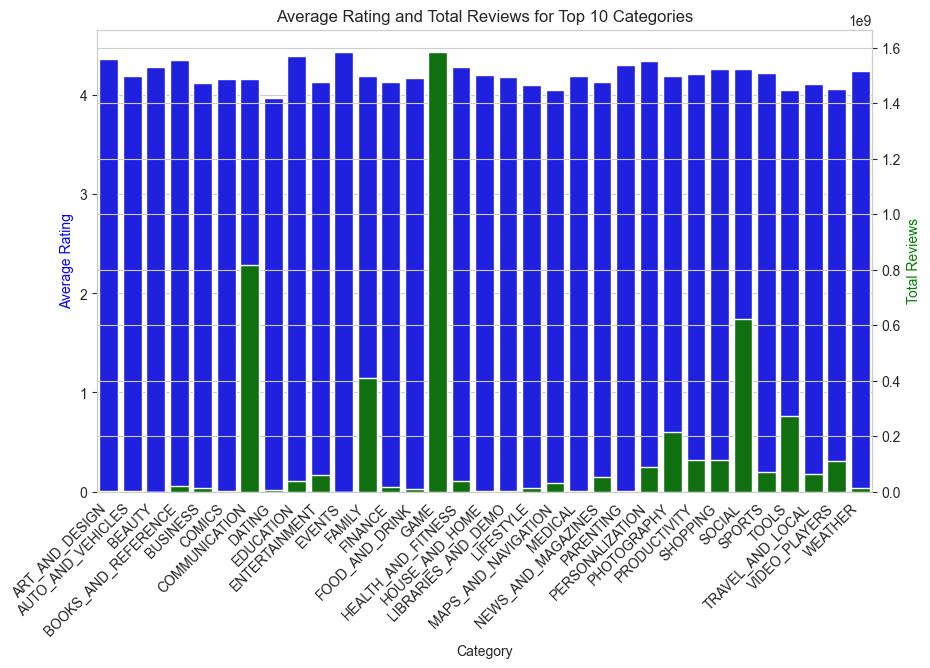

In [38]:
# Ensure 'Reviews' and 'Installs' columns are numeric
apps_df["Reviews"] = pd.to_numeric(apps_df["Reviews"], errors='coerce')
apps_df["Installs"] = pd.to_numeric(apps_df["Installs"], errors='coerce')

# Drop rows where 'Reviews' or 'Installs' have NaN values
filtered_df = apps_df.dropna(subset=["Reviews", "Installs"])

# Filter and group by Category
category_stats = filtered_df.groupby("Category").agg(
    avg_rating=("Rating", "mean"),
    total_reviews=("Reviews", "sum")
).reset_index()

# Make sure 'avg_rating' and 'total_reviews' columns are numeric
category_stats["avg_rating"] = category_stats["avg_rating"].astype(float)
category_stats["total_reviews"] = category_stats["total_reviews"].astype(float)

# Check data types for confirmation
print(category_stats.dtypes)

# Set up the figure for the grouped bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average rating on the left y-axis
sns.barplot(x="Category", y="avg_rating", data=category_stats, ax=ax1, color='blue')
ax1.set_ylabel('Average Rating', color='blue')
ax1.set_xticklabels(category_stats["Category"], rotation=45, ha="right")

# Create a second y-axis to plot total reviews
ax2 = ax1.twinx()
sns.barplot(x="Category", y="total_reviews", data=category_stats, ax=ax2, color='green')
ax2.set_ylabel('Total Reviews', color='green')

# Set chart title
plt.title("Average Rating and Total Reviews for Top 10 Categories")
plt.show()


# 5. Create a violin plot to visualize the distribution of ratings for each app category, but only include categories with more than 50 apps and app name should contain letter “C” and exclude apps with fewer than 10 reviews and rating should be less 4.0. this graph should work only between 4 PM IST to 6 PM IST apart from that time we should not show this graph in dashboard itself.

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [40]:
category_counts = apps_df["Category"].value_counts()
valid_categories = category_counts[category_counts > 50].index

# 2. Filter app names that contain the letter "C"
filtered_df = apps_df[apps_df["Category"].isin(valid_categories) & apps_df["App"].str.contains("C", case=False)]

# 3. Exclude apps with fewer than 10 reviews
filtered_df = filtered_df[filtered_df["Reviews"] >= 10]

# 4. Exclude apps with a rating less than 4.0
filtered_df = filtered_df[filtered_df["Rating"] >= 4.0]

# 5. Get the current time in IST and check if it's between 4 PM and 6 PM IST
ist = pytz.timezone('Asia/Kolkata')
current_time_ist = datetime.datetime.now(ist)    # Convert to IST

In [41]:
if 16 <= current_time_ist.hour < 18:
    # Create the violin plot for ratings distribution by category
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Category", y="Rating", data=filtered_df)
    plt.xticks(rotation=45, ha="right")
    plt.title("Distribution of Ratings for App Categories (Filtered)")
    plt.ylabel('Rating')
    plt.xlabel('Category')
    plt.show()
else:
    print("The graph is available only between 4 PM IST to 6 PM IST.")

The graph is available only between 4 PM IST to 6 PM IST.


# # 6. Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase in installs exceeds 20% month-over-month and content rating should be teen and app name should start with letter ‘E’ and installs should be more than 10k as well as this graph should work only between 6 PM IST to 9 PM IST apart from that time we should not show this graph in dashboard itself. 

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pytz
import pandas as pd

In [43]:
filtered_df = apps_df[
    (apps_df["Content Rating"] == "Teen") &
    (apps_df["App"].str.startswith("E")) &
    (apps_df["Installs"] > 10000)
]

In [44]:
# Convert the 'Last Updated' column to datetime if it's not already
filtered_df["Last Updated"] = pd.to_datetime(filtered_df["Last Updated"])

# Extract year and month from 'Last Updated' for time series analysis
filtered_df["Year-Month"] = filtered_df["Last Updated"].dt.to_period("M")

# Group by category and 'Year-Month' and sum installs
time_series_data = filtered_df.groupby(["Year-Month", "Category"])["Installs"].sum().reset_index()

# Calculate month-over-month percentage change in installs
time_series_data["MoM Growth (%)"] = time_series_data.groupby("Category")["Installs"].pct_change() * 100

# Get the current time in IST and check if it's between 6 PM and 9 PM IST
ist = pytz.timezone('Asia/Kolkata')
current_time_ist = datetime.datetime.now(ist)  # Get current time in IST

C:\Users\17bin\AppData\Local\Temp\ipykernel_14880\803353128.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\17bin\AppData\Local\Temp\ipykernel_14880\803353128.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
if 18 <= current_time_ist.hour < 21:
    plt.figure(figsize=(14, 8))
    
    
    sns.lineplot(x="Year-Month", y="Installs", hue="Category", data=time_series_data, marker="o")
    
    for category in time_series_data["Category"].unique():
        category_data = time_series_data[time_series_data["Category"] == category]
        growth_periods = category_data[category_data["MoM Growth (%)"] > 20]
        
        for i in range(1, len(growth_periods)):
            start = growth_periods.iloc[i - 1]
            end = growth_periods.iloc[i]
            plt.axvspan(start["Year-Month"].start_time, end["Year-Month"].start_time, color='yellow', alpha=0.3)

    plt.title("Trend of Total Installs Over Time Segmented by App Category")
    plt.xlabel("Month")
    plt.ylabel("Total Installs")
    plt.xticks(rotation=45)
    plt.legend(title="App Category")
    plt.tight_layout()
    plt.show()
else:
    print(f"The graph is available only between 6 PM IST to 9 PM IST. Current time is {current_time_ist.strftime('%I:%M %p IST')}.")

The graph is available only between 6 PM IST to 9 PM IST. Current time is 03:25 PM IST.


# 7. Generate a heatmap to show the correlation matrix between installs, ratings, and review counts. Filter the data to include only apps that have been updated within the last year and have at least 100,000 installs and reviews count should be more than 1k and genres name should not be Starting with characters A , F , E , G , I , K . this graph should work only between 2 PM IST to 4 PM IST apart from that time we should not show this graph in dashboard itself.

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pytz
import pandas as pd


In [48]:
apps_df["Last Updated"] = pd.to_datetime(apps_df["Last Updated"], errors='coerce')
ist = pytz.timezone('Asia/Kolkata')
current_time_ist = datetime.datetime.now(ist)

# Filtering the dataset
one_year_ago = pd.Timestamp.now() - pd.DateOffset(years=1)

filtered_df = apps_df[
    (apps_df["Last Updated"] >= one_year_ago) &  # Updated in the last year
    (apps_df["Installs"] >= 100000) &  # At least 100,000 installs
    (apps_df["Reviews"] > 1000) &  # More than 1,000 reviews
    (~apps_df["Genres"].str.startswith(("A", "F", "E", "G", "I", "K")))  # Genre should not start with these characters
]


c:\Users\17bin\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning:

All-NaN slice encountered

c:\Users\17bin\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning:

All-NaN slice encountered

c:\Users\17bin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



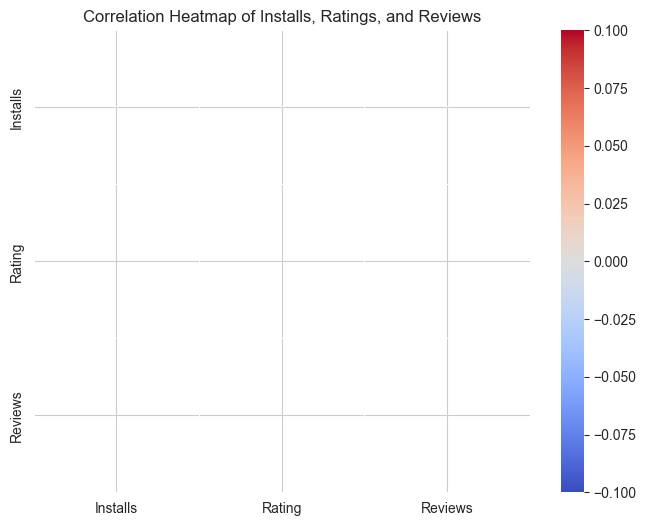

In [ ]:
# Select relevant columns for correlation
correlation_data = filtered_df[["Installs", "Rating", "Reviews"]].corr()


if 14 <= current_time_ist.hour < 16:
    plt.figure(figsize=(8, 6))
    
    
    sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

    plt.title("Correlation Heatmap of Installs, Ratings, and Reviews")
    plt.show()
else:
    print(f"The heatmap is available only between 2 PM IST and 4 PM IST. Current time is {current_time_ist.strftime('%I:%M %p IST')}.")